In [1]:
import sqlite3
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from collections import OrderedDict
import random

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jameswright/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jameswright/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
conn = sqlite3.connect('reddit.db')
c = conn.cursor()

In [3]:
def wordFilter(excluded, wordrow):
    filtered = [word for word in wordrow if word not in excluded]
    return filtered

def lowerCaseArray(wordrow):
    lowercased = [word.lower() for word in wordrow]
    return lowercased

stopwords = nltk.corpus.stopwords.words('english')

# def data_processing(sql):
#     c.execute(sql)
#     data = {'wordMatrix':[], 'all_words':[]}
#     row = c.fetchone()
#     while row is not None:
#         wordrow = nltk.tokenize.word_tokenize(row[0]+" "+row[1])
#         wordrow_lowercased = lowerCaseArray(wordrow)
#         wordrow_nostopwords = wordFilter(stopwords,wordrow_lowercased)
#         data['all_words'].extend(wordrow_nostopwords)
#         data['wordMatrix'].append(wordrow_nostopwords)
#         row = c.fetchone()
#     return data

In [4]:
subreddits = ['datascience','gameofthrones']

data_dfs = {}
for subject in subreddits:
    sql='''SELECT topicTitle,topicText,topicCategory 
                                           FROM topics
                                           WHERE topicCategory = {}
                                        '''.format(repr(subject))
    df = pd.read_sql_query(sql, conn)
    df = df.drop_duplicates().reset_index(drop=True)
    df['all_text'] = df['topicTitle'] + ' ' + df['topicText']
    df['all_words'] = df['all_text'].apply(lambda x: nltk.tokenize.word_tokenize(x.lower()))\
                                    .apply(lambda x: wordFilter(stopwords, x))
    data_dfs[subject] = df

In [5]:
data_dfs['datascience']

,topicTitle,topicText,topicCategory,all_text,all_words
0,Weekly Entering & Transitioning Thread | 02 Au...,Welcome to this week's entering & transitionin...,datascience,Weekly Entering & Transitioning Thread | 02 Au...,"[weekly, entering, &, transitioning, thread, |..."
1,I am tired of being assessed as a 'software en...,"This is largely just a complaint post, but I a...",datascience,I am tired of being assessed as a 'software en...,"[tired, assessed, 'software, engineer, ', job,..."
2,Share your portfolio (website / github / other),Looking to start planning my own (entry level)...,datascience,Share your portfolio (website / github / other...,"[share, portfolio, (, website, /, github, /, )..."
3,Is there no point in learning math and stats f...,"I'm a faculty member who teaches data science,...",datascience,Is there no point in learning math and stats f...,"[point, learning, math, stats, data, science, ..."
4,Google Sheets surprisingly powerful? Web scrap...,Google Sheets has four main functions for web ...,datascience,Google Sheets surprisingly powerful? Web scrap...,"[google, sheets, surprisingly, powerful, ?, we..."
...,...,...,...,...,...
94,Predictive Maintenance,"Hi all, \n\nI am a data science intern working...",datascience,"Predictive Maintenance Hi all, \n\nI am a data...","[predictive, maintenance, hi, ,, data, science..."
95,R as an ETL tool for building a data warehouse,"Hello everyone,\n\nI work as a data-lead at a ...",datascience,R as an ETL tool for building a data warehouse...,"[r, etl, tool, building, data, warehouse, hell..."
96,Identify rows from dataset A that are most sim...,I have a problem and I am look for some resour...,datascience,Identify rows from dataset A that are most sim...,"[identify, rows, dataset, similar, rows, datas..."
97,Creative Analysis - Best way to approach?,We're analyzing some creatives from past adver...,datascience,Creative Analysis - Best way to approach? We'r...,"[creative, analysis, -, best, way, approach, ?..."


In [6]:
datascience_flat_list = [item for sublist in data_dfs['datascience']['all_words'].to_list() for item in sublist]
gameofthrones_flat_list = [item for sublist in data_dfs['gameofthrones']['all_words'].to_list() for item in sublist]

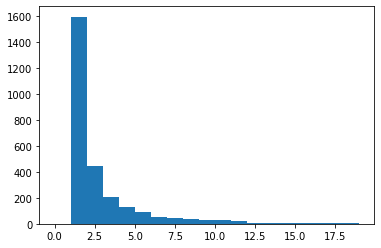

In [7]:
wordfreqs_cat1 = nltk.FreqDist(datascience_flat_list)
plt.hist(wordfreqs_cat1.values(), bins = range(20))
plt.show()

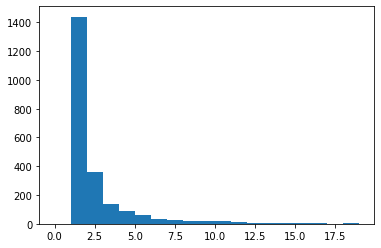

In [8]:
wordfreqs_cat2 = nltk.FreqDist(gameofthrones_flat_list)
plt.hist(wordfreqs_cat2.values(), bins = range(20))
plt.show()

In [9]:
print(wordfreqs_cat1.hapaxes())

['02', '09', 'traditional', 'schools', 'alternative', 'bootcamps', 'resumes', 'elementary', 'faq', '//www.reddit.com/r/datascience/wiki/frequently-asked-questions', 'wiki', 'threads', '//www.reddit.com/r/datascience/search', 'q=weekly', '20thread', 'restrict_sr=1', 'sort=new', 'assessed', "'software", 'largely', 'complaint', 'covid-19', 'march', 'low-point', 'bothers', 'timed', 'employs', 'differently', 'cooks', 'knives', 'soldiers', 'cook', 'knife', 'fight', 'janky-ass', 'tree-based', 'sorting', 'relevance', 'involves', 'github', 'planning', 'inspiration', 'teaches', '//www.reddit.com/r/datascience/comments/i3o4fe/i_am_tired_of_being_assessed_as_a_software/', 'oddly', 'statistically', 'driven', 'tons', 'hypothesis', 'intro', 'noise', 'graduate-level', 'similarly-purposed', 'masters-level', 'foundational', 'derivatives', 'big-10', 'multivariable', 'algebra', 'cleansing', 'undergraduate-level', 'covers', 'toward', 'stem', 'majors', 'workforce', 'practitioner', 'academia', 'textbooks', '

In [10]:
print(wordfreqs_cat2.hapaxes())

['reddit-based', 'roleplay', 'delighted', 'invite', 'iteration', 'successor', '/r/ironthronepowers', '/r/sevenkingdoms', 'lore', 'suggests', '77', 'doom', 'valyria', 'aegon', 'seven', 'normal', 'regions', 'smaller', 'exciting', 'immersive', 'create', 'stories', 'magnificent', 'exploration', 'untamed', 'constantly', 'romance', 'brotherhood', 'betrayal', 'current', 'roughly', 'seventeen', 'scarred', 'nearly', 'rebellion', 'amends', 'merely', 'exhausted', 'rebellious', '74', 'led', 'retribution', 'ancestor', 'hungry', 'andals', 'culminated', 'subsequent', 'scores', 'lowborn', 'disaster', 'nobles', 'individually', 'ransomed', 'raid', 'plunged', 'avoiding', 'cornered', 'manderly', 'highborn', 'sons', 'daughters', 'kinsmen', 'exists', 'mount', 'internally', 'reel', 'consequences', 'spiral', 'infighting', 'myranda', 'i.', 'successfully', 'reign', 'arrangements', 'spectacular', 'remains', 'relatively', 'internal', 'struggles', 'rising', 'powerful', 'clansmen', 'danger', 'await', 'moon', 'isola

In [11]:
print(wordfreqs_cat1.most_common(20))

[(',', 572), ('.', 522), ('data', 222), ('*', 212), ('?', 175), (')', 134), ('(', 132), (':', 79), ('’', 75), ('science', 70), ("'s", 59), ('work', 58), ('!', 52), ("n't", 50), ('would', 50), ('-', 49), ("'m", 49), ('job', 47), ('like', 47), ('get', 39)]


In [12]:
print(wordfreqs_cat2.most_common(20))

[('.', 392), (',', 381), ('[', 111), (']', 111), ('spoilers', 100), ('?', 94), ("'s", 78), ('’', 66), ('*', 63), ('..', 50), (')', 44), ('king', 42), ('(', 42), (':', 41), ('show', 39), ('would', 36), ('game', 34), ('time', 33), ("n't", 33), ('one', 31)]


In [13]:
stemmer = nltk.SnowballStemmer("english")

def wordStemmer(wordrow):
    stemmed = [stemmer.stem(word) for word in wordrow]
    return stemmed

tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+|[^\w\s]+')


manual_stopwords = [',', '.', ')', '(', "n't", '-', ':', '*', "'m", "?", "'s", 'would', 'https', 'know','get',
                    '!', '[', ']', '"', '=', '%', '1','2','3','4','5','6','7','8','9','10',';','#','e.g','&',
                    '’',"''",'``','..','cool',"'",'/','**','!','!!','!!!',
                   ]


In [14]:
for subject in subreddits:
    df = data_dfs[subject].copy()
    df['all_words_cleaned'] = df['all_text'].apply(lambda x: tokenizer.tokenize(x.lower()))\
                                            .apply(lambda x: wordFilter(stopwords+manual_stopwords, x))\
                                            .apply(wordStemmer)
    data_dfs[subject+'_cleaned'] = df

In [15]:
data_dfs['datascience_cleaned']

,topicTitle,topicText,topicCategory,all_text,all_words,all_words_cleaned
0,Weekly Entering & Transitioning Thread | 02 Au...,Welcome to this week's entering & transitionin...,datascience,Weekly Entering & Transitioning Thread | 02 Au...,"[weekly, entering, &, transitioning, thread, |...","[week, enter, transit, thread, |, 02, aug, 202..."
1,I am tired of being assessed as a 'software en...,"This is largely just a complaint post, but I a...",datascience,I am tired of being assessed as a 'software en...,"[tired, assessed, 'software, engineer, ', job,...","[tire, assess, softwar, engin, job, interview,..."
2,Share your portfolio (website / github / other),Looking to start planning my own (entry level)...,datascience,Share your portfolio (website / github / other...,"[share, portfolio, (, website, /, github, /, )...","[share, portfolio, websit, github, look, start..."
3,Is there no point in learning math and stats f...,"I'm a faculty member who teaches data science,...",datascience,Is there no point in learning math and stats f...,"[point, learning, math, stats, data, science, ...","[point, learn, math, stat, data, scienc, facul..."
4,Google Sheets surprisingly powerful? Web scrap...,Google Sheets has four main functions for web ...,datascience,Google Sheets surprisingly powerful? Web scrap...,"[google, sheets, surprisingly, powerful, ?, we...","[googl, sheet, surpris, power, web, scrape, sh..."
...,...,...,...,...,...,...
94,Predictive Maintenance,"Hi all, \n\nI am a data science intern working...",datascience,"Predictive Maintenance Hi all, \n\nI am a data...","[predictive, maintenance, hi, ,, data, science...","[predict, mainten, hi, data, scienc, intern, w..."
95,R as an ETL tool for building a data warehouse,"Hello everyone,\n\nI work as a data-lead at a ...",datascience,R as an ETL tool for building a data warehouse...,"[r, etl, tool, building, data, warehouse, hell...","[r, etl, tool, build, data, warehous, hello, e..."
96,Identify rows from dataset A that are most sim...,I have a problem and I am look for some resour...,datascience,Identify rows from dataset A that are most sim...,"[identify, rows, dataset, similar, rows, datas...","[identifi, row, dataset, similar, row, dataset..."
97,Creative Analysis - Best way to approach?,We're analyzing some creatives from past adver...,datascience,Creative Analysis - Best way to approach? We'r...,"[creative, analysis, -, best, way, approach, ?...","[creativ, analysi, best, way, approach, analyz..."


In [16]:
data_dfs['gameofthrones_cleaned'].loc[14]['all_words_cleaned']

['spoiler',
 'bob',
 'strategi',
 'ok',
 'battl',
 'bastard',
 'probabl',
 'one',
 'greatest',
 'battl',
 'scene',
 'histori',
 'tv',
 'film',
 'believ',
 'mark',
 'start',
 'new',
 'era',
 'battl',
 'scene',
 'howev',
 'tactic',
 'logist',
 'lead',
 'take',
 'place',
 'battl',
 'frank',
 'atroci',
 'believ',
 'ramsay',
 'could',
 'achiev',
 'victori',
 'battl',
 'bastard',
 'pre',
 'battl',
 'go',
 'one',
 'ramsay',
 'biggest',
 'error',
 'lead',
 'battl',
 'disregard',
 'reconnaiss',
 'seen',
 'previous',
 'bolton',
 'larg',
 'forc',
 'outrid',
 'unfamiliar',
 'outrid',
 'act',
 'light',
 'cavalri',
 'battl',
 'primarili',
 'use',
 'scout',
 'terrain',
 'collect',
 'intellig',
 'enemi',
 'troop',
 'movement',
 'armi',
 'composit',
 'scout',
 'prove',
 'use',
 'anticip',
 'arriv',
 'knight',
 'vale',
 'ramsay',
 'appar',
 'want',
 'look',
 'weak',
 'front',
 'umber',
 'karstark',
 'henc',
 'reason',
 'decid',
 'meet',
 'snow',
 'open',
 'battl',
 'jon',
 'snow',
 'ragtag',
 'forc',
 '

In [17]:
datascience_cleaned_flat_list = [item for sublist in data_dfs['datascience_cleaned']['all_words_cleaned'].to_list() for item in sublist]
gameofthrones_cleaned_flat_list = [item for sublist in data_dfs['gameofthrones_cleaned']['all_words_cleaned'].to_list() for item in sublist]

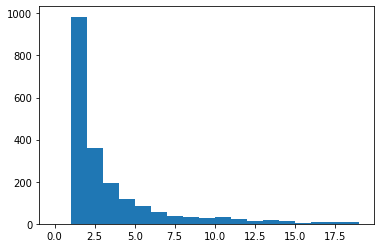

In [18]:
wordfreqs_cat1 = nltk.FreqDist(datascience_cleaned_flat_list)
plt.hist(wordfreqs_cat1.values(), bins = range(20))
plt.show()

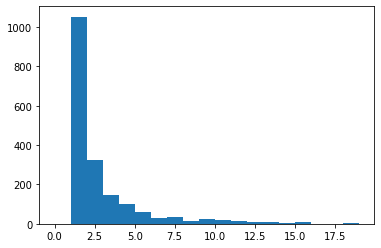

In [19]:
wordfreqs_cat2 = nltk.FreqDist(gameofthrones_cleaned_flat_list)
plt.hist(wordfreqs_cat2.values(), bins = range(20))
plt.show()

In [20]:
print(wordfreqs_cat1.hapaxes())

['02', '09', 'elementari', 'faq', 'q', '20thread', 'restrict_sr', 'complaint', '19', 'march', 'bother', 'knive', 'soldier', 'knife', 'fight', 'janki', 'ass', 'i3o4f', 'i_am_tired_of_being_assessed_as_a_softwar', 'odd', 'driven', 'ton', 'hypothesi', ')?**', 'intro', 'nois', 'foundat', 'deriv', '?**', 'algebra', 'cleans', 'stem', 'workforc', 'academia', 'record', 'surpris', 'power', 'four', 'unconvent', 'q5yvotqd06m', '4a12xqqpjxu', 'preemptiv', 'subscrib', 'ucbv194xnr6ciqccuw1v2rmq', 'sub_confirm', 'chelsea', 'rooki', 'gui', 'beauti', 'relationship', 'verbos', 'this_th', 'this_thing_againbutdiffer', 'itsthisthing_again', '1000', 'butt', 'extens', 'revisit', 'organis', 'scaffold', 'whip', 'fart', 'sack', 'indent', 'jose', 'portilla', 'udemi', 'dive', 'except', 'titan', 'ish', 'desir', 'command', 'warm', 'fresher', '2019', 'pgp', 'incomplet', '58', 'blk', 'jln', 'aman', 'puri', 'kepong', 'accur', 'multi', 'zip', 'failur', 'repost', 'qualifi', 'exam', 'truth', 'gtfo', 'qual', 'unfamiliar',

In [21]:
print(wordfreqs_cat2.hapaxes())

['#/', 'delight', 'invit', 'iter', 'successor', 'ironthronepow', 'sevenkingdom', 'lore', 'suggest', '77', 'doom', 'valyria', 'aegon', 'seven', 'normal', 'smaller', 'excit', 'immers', 'magnific', 'untam', 'romanc', 'brotherhood', '”,', 'rough', 'seventeen', 'scar', 'rebellion', 'amend', 'mere', 'exhaust', 'rebelli', '74', 'led', 'retribut', 'ancestor', 'hungri', 'andal', 'culmin', 'subsequ', 'score', 'lowborn', 'disast', 'individu', 'ransom', 'plung', 'mander', 'highborn', 'kinsmen', 'exist', 'reel', 'consequ', 'spiral', 'infight', 'myranda', 'reign', 'arrang', 'spectacular', 'rise', 'clansmen', 'danger', 'await', 'moon', 'isolationist', 'ongo', 'prefer', 'upris', 'crush', 'invad', 'driven', 'slain', 'fredrick', 'unifi', 'bridg', 'raventre', 'band', 'pillag', 'facad', 'simmer', 'restor', 'attent', 'eas', 'escal', 'unhind', 'postur', 'wield', 'eastern', 'proxi', 'leadership', 'fisher', 'ralli', 'yoke', 'grievous', 'foreign', 'magick', 'whisper', 'doubt', 'spread', 'retak', 'perish', 'han

In [22]:
print(wordfreqs_cat1.most_common(20))

[('data', 232), ('work', 93), ('use', 86), ('scienc', 73), ('model', 62), ('job', 58), ('scientist', 50), ('like', 49), ('want', 47), ('learn', 41), ('look', 40), ('time', 38), ('project', 38), ('featur', 36), ('code', 33), ('tri', 30), ('result', 30), ('python', 29), ('make', 29), ('one', 29)]


In [23]:
print(wordfreqs_cat2.most_common(20))

[('spoiler', 100), ('king', 50), ('show', 49), ('season', 42), ('time', 38), ('one', 35), ('like', 35), ('game', 34), ('stark', 34), ('end', 33), ('jon', 31), ('throne', 29), ('hous', 28), ('battl', 27), ('go', 25), ('got', 25), ('die', 24), ('watch', 24), ('jaim', 24), ('peopl', 23)]


In [24]:
vocabulary = []

for subject in subreddits:
    
    df = data_dfs[subject+'_cleaned'].copy()
    
    vocabulary += list(set([item for sublist in df['all_words_cleaned'].to_list() for item in sublist]))

In [25]:
from collections import OrderedDict



for subject in subreddits:
    
    df = data_dfs[subject+'_cleaned'].copy()

    df['data'] = df['all_words_cleaned'].apply(lambda x: list(set(x)))\
                                        .apply(lambda x: {**{k:True for k in x},**{k:False for k in vocabulary if k not in x}})\
                                        .apply(lambda x: OrderedDict(sorted(x.items())))
    df['label'] = subject
                                               
    data_dfs[subject+'_labelled'] = df

In [26]:
data_dfs['gameofthrones_labelled'].head()

,topicTitle,topicText,topicCategory,all_text,all_words,all_words_cleaned,data,label
0,[Spoilers] /r/centuryofblood - a new ASOIAF ro...,#/r/CenturyofBlood - a Reddit-based ASOIAF rol...,gameofthrones,[Spoilers] /r/centuryofblood - a new ASOIAF ro...,"[[, spoilers, ], /r/centuryofblood, -, new, as...","[spoiler, r, centuryofblood, new, asoiaf, role...","{'!""': False, '!"".': False, '!)': False, '!?':...",gameofthrones
1,"[NO SPOILERS] ""My own heroes are the dreamers,...",,gameofthrones,"[NO SPOILERS] ""My own heroes are the dreamers,...","[[, spoilers, ], ``, heroes, dreamers, ,, men,...","[spoiler, hero, dreamer, men, women, tri, make...","{'!""': False, '!"".': False, '!)': False, '!?':...",gameofthrones
2,[no spoilers] I met the dog that played Nymeri...,,gameofthrones,[no spoilers] I met the dog that played Nymeri...,"[[, spoilers, ], met, dog, played, nymeria, .,...","[spoiler, met, dog, play, nymeria, arya, dire,...","{'!""': False, '!"".': False, '!)': False, '!?':...",gameofthrones
3,[NO SPOILERS] Not Today Arya Print - colors bl...,,gameofthrones,[NO SPOILERS] Not Today Arya Print - colors bl...,"[[, spoilers, ], today, arya, print, -, colors...","[spoiler, today, arya, print, color, blew, away]","{'!""': False, '!"".': False, '!)': False, '!?':...",gameofthrones
4,[NO SPOILERS] Will the House of the Dragon spi...,Does anyone know if this upcoming GOT spin-off...,gameofthrones,[NO SPOILERS] Will the House of the Dragon spi...,"[[, spoilers, ], house, dragon, spin-off, feat...","[spoiler, hous, dragon, spin, featur, high, va...","{'!""': False, '!"".': False, '!)': False, '!?':...",gameofthrones


In [27]:
dfs = []

for subject in subreddits:
    dfs.append(data_dfs[subject+'_labelled'][['data','label']])
    
df = pd.concat(dfs,axis=0)

In [34]:
import pickle

with open('reddit_data.p', 'wb') as f:
    pickle.dump(df,f)